<a href="https://colab.research.google.com/github/davadeola/ML-Group-Final-Task/blob/main/Group_work_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/drive/MyDrive/modified_data.csv')


In [3]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [4]:
data.shape
len(data)

1460

In [5]:
data.drop(labels='Id', axis=1, inplace=True )

In [6]:
original_features = list(data.columns)
original_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

## Fill in Missing Values


In [7]:
features_missing_values = list(data.columns[data.isna().any()])

In [8]:
bfill, mean_fill = [],[]

In [9]:
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100, ' ', data[feature].dtype)
  if data[feature].dtype == 'float64':
    mean_fill.append(feature)
  else:
     bfill.append(feature) 

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [10]:
#data.dropna(thresh=0.5*len(data), inplace=True)

In [11]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(), inplace=True)

In [12]:
for feature in bfill:
  data[feature].fillna(method='bfill', inplace=True)

In [13]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [14]:
data['FireplaceQu'].isna().sum()

2

In [15]:
data['FireplaceQu'].fillna(method='ffill', inplace=True)

## Separting Ordinal and Numerical Data

In [16]:
categorical_features = list(data.select_dtypes(include=['object']).columns)

In [17]:
data[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [18]:
numerical_features = list(set(original_features)-set(categorical_features))

In [19]:
nominal = ['MSZoning', 'BsmtQual', 'Neighborhood']
ordinal = list(set(categorical_features)- set(nominal))

In [20]:
df_nominal= pd.get_dummies(data[nominal])

In [21]:
df_nominal

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal= data[ordinal]

In [23]:
data[numerical_features]

,LotFrontage,LotArea,2ndFlrSF,BsmtUnfSF,SalePrice,1stFlrSF,LowQualFinSF,GarageArea,MoSold,YearBuilt,BsmtFinSF2,HalfBath,GarageCars,WoodDeckSF,3SsnPorch,BsmtHalfBath,FullBath,GrLivArea,OverallCond,TotRmsAbvGrd,MSSubClass,GarageYrBlt,BsmtFinSF1,OpenPorchSF,EnclosedPorch,MiscVal,Fireplaces,BsmtFullBath,TotalBsmtSF,KitchenAbvGr,OverallQual,MasVnrArea,YearRemodAdd,PoolArea,YrSold,ScreenPorch,BedroomAbvGr
0,65.0,8450,854,150,208500,856,0,548,2,2003,0,1,2,0,0,0,2,1710,5,8,60,2003.0,706,61,0,0,0,1,856,1,7,196.0,2003,0,2008,0,3
1,80.0,9600,0,284,181500,1262,0,460,5,1976,0,0,2,298,0,1,2,1262,8,6,20,1976.0,978,0,0,0,1,0,1262,1,6,0.0,1976,0,2007,0,3
2,68.0,11250,866,434,223500,920,0,608,9,2001,0,1,2,0,0,0,2,1786,5,6,60,2001.0,486,42,0,0,1,1,920,1,7,162.0,2002,0,2008,0,3
3,60.0,9550,756,540,140000,961,0,642,2,1915,0,0,3,0,0,0,1,1717,5,7,70,1998.0,216,35,272,0,1,1,756,1,7,0.0,1970,0,2006,0,3
4,84.0,14260,1053,490,250000,1145,0,836,12,2000,0,1,3,192,0,0,2,2198,5,9,60,2000.0,655,84,0,0,1,1,1145,1,8,350.0,2000,0,2008,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,694,953,175000,953,0,460,8,1999,0,1,2,0,0,0,2,1647,5,7,60,1999.0,0,40,0,0,1,0,953,1,6,0.0,2000,0,2007,0,3
1456,85.0,13175,0,589,210000,2073,0,500,2,1978,163,0,2,349,0,0,2,2073,6,7,20,1978.0,790,0,0,0,2,1,1542,1,6,119.0,1988,0,2010,0,3
1457,66.0,9042,1152,877,266500,1188,0,252,5,1941,0,0,1,0,0,0,2,2340,9,9,70,1941.0,275,60,0,2500,2,0,1152,1,7,0.0,2006,0,2010,0,4
1458,68.0,9717,0,0,142125,1078,0,240,4,1950,1029,0,1,366,0,0,1,1078,6,5,20,1950.0,49,0,112,0,0,1,1078,1,5,0.0,1996,0,2010,0,2


In [24]:
new_data = pd.concat([df_nominal, df_ordinal, data[numerical_features]], axis = 1)

In [25]:
new_data.shape

(1460, 107)

In [26]:
target= ['SalePrice']

In [27]:
new_data.drop('SalePrice', axis=1, inplace=True)

In [28]:
X=new_data.to_numpy()

In [29]:
X.shape

(1460, 106)

In [30]:
data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [31]:
y=data[target].to_numpy()

## Standardization of the dataset

In [32]:
X =StandardScaler().fit_transform(X)

In [33]:
y=StandardScaler().fit_transform(y)

## Splitting the Dataset into Train and Test

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [35]:
X_train.shape

(1022, 106)

## Feature Selection using Lasso (L1)

In [36]:
sel_ = SelectFromModel(Lasso(alpha=.3))

In [37]:
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.3, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [38]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False])

In [39]:
x_train_selected = sel_.transform(X_train)
x_test_selected = sel_.transform(X_test)

In [40]:
x_train_selected.shape

(1022, 5)

In [41]:
pd.DataFrame(x_train_selected)

,0,1,2,3,4
0,0.663451,0.311725,0.317031,0.562234,0.651479
1,0.663451,0.311725,-0.844210,-1.163889,-0.795151
2,0.663451,0.311725,0.060035,-0.687324,0.651479
3,-3.660830,1.650307,0.741550,1.932643,2.098110
4,-0.777976,0.311725,0.277053,-0.589275,0.651479
...,...,...,...,...,...
1017,-0.777976,0.311725,-0.383521,0.585036,-0.071836
1018,0.663451,0.311725,0.886229,0.147235,-1.518467
1019,0.663451,0.311725,-1.240174,-0.441061,-0.795151
1020,-0.777976,-1.026858,-0.170310,-0.331610,0.651479


## Deep Learning ANN

In [42]:

model= Sequential()
model.add(Dense(6, input_shape=(x_train_selected.shape[1],),activation='relu'))
model.add(Dense(146, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 146)               1022      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 147       
Total params: 1,205
Trainable params: 1,205
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [43]:


model.compile(Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['MAE'])

history=model.fit(x_train_selected, y_train, epochs=30, batch_size=150, verbose=0, validation_split=0.3)
predictions = model.predict(x_test_selected)

dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])


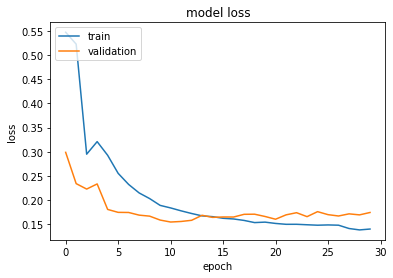

In [44]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Final Loss: 0.140, Final MAE: 0.266')

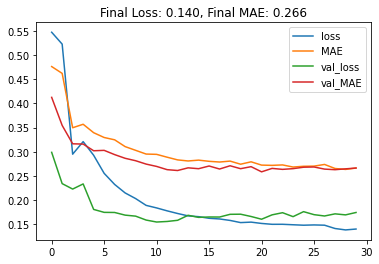

In [45]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()

final_loss=historydf['loss'].to_numpy()[-1]
final_mae=historydf['MAE'].to_numpy()[-1]

historydf.plot()
plt.title('Final Loss: %.3f, Final MAE: %.3f' % (final_loss, final_mae))